In [ ]:
from tensorflow_datasets.core import features
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import pandas as pd 
import numpy as np

# Getting info about dataset 

In [ ]:
builder = tfds.builder('colorectal_histology')
info = builder.info
info

#Preparing data

In [ ]:
ds_train = tfds.load('colorectal_histology', split='train[:80%]')
ds_test = tfds.load('colorectal_histology', split='train[80%:]')

In [ ]:
train_images = np.array([e['image'].numpy() for e in ds_train])
train_labels = np.array([e['label'].numpy() for e in ds_train])

test_images = np.array([e['image'].numpy() for e in ds_test])
test_labels = np.array([e['label'].numpy() for e in ds_test])

In [ ]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255.0
test_images /= 255.0

In [ ]:
train_labels_cat = keras.utils.to_categorical(train_labels, 8)
test_labels_cat = keras.utils.to_categorical(test_labels, 8)

# Data examples

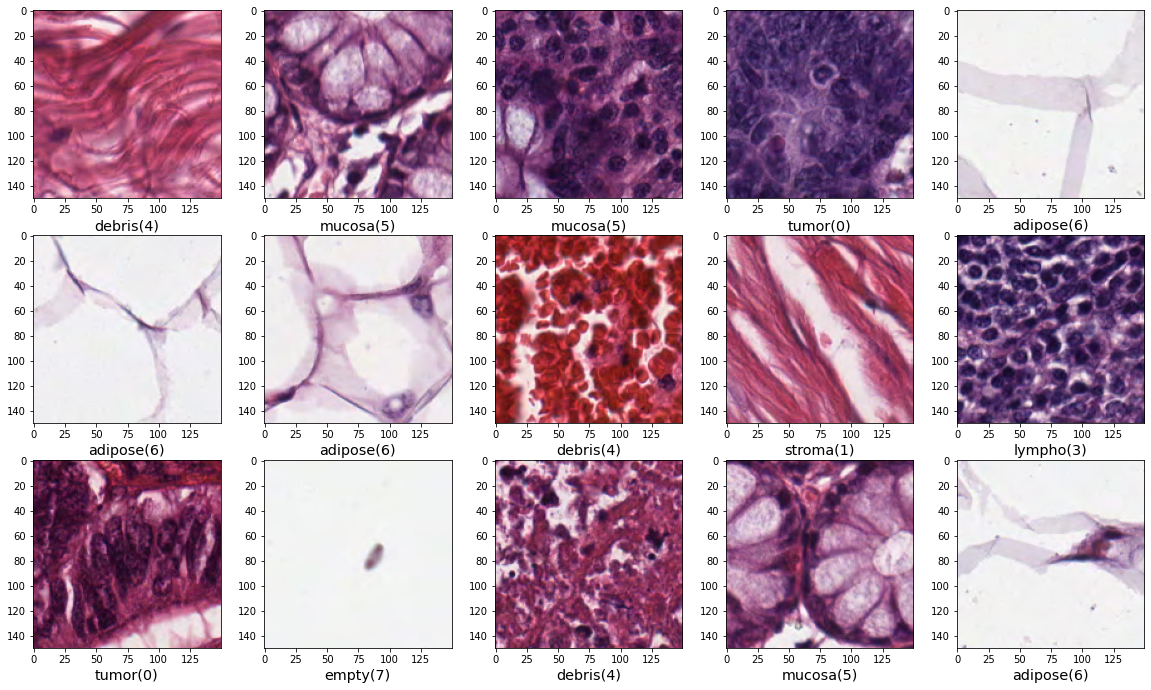

In [ ]:
plt.figure(figsize=(20,20))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xlabel(info.features["label"].names[train_labels[i]] + 
             f"({train_labels[i]})", fontsize='x-large')
  plt.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

#Creating and running model


In [ ]:
model = keras.Sequential([                        
  keras.layers.Conv2D(32, 5, input_shape=(150,150,3)),
  tf.keras.layers.LeakyReLU(alpha=0.1),
  keras.layers.MaxPool2D(pool_size=(2,2)),

  keras.layers.Conv2D(64, 5),
  tf.keras.layers.LeakyReLU(alpha=0.1),
  keras.layers.MaxPool2D(pool_size=(2,2)),

  keras.layers.Conv2D(128, 5),
  tf.keras.layers.LeakyReLU(alpha=0.1),
  keras.layers.MaxPool2D(pool_size=(2,2)),

  keras.layers.Flatten(),
  keras.layers.Dense(256),
  tf.keras.layers.LeakyReLU(alpha=0.1),
  #keras.layers.Dropout(0.5),
  keras.layers.Dense(8, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=5, 
          batch_size=32, validation_split=0.15)

Epoch 1/5
107/107 [==============================] - 117s 1s/step - loss: 1.2250 - accuracy: 0.4744 - val_loss: 0.9841 - val_accuracy: 0.6250
Epoch 2/5
107/107 [==============================] - 114s 1s/step - loss: 0.8543 - accuracy: 0.6618 - val_loss: 0.7798 - val_accuracy: 0.7167
Epoch 3/5
107/107 [==============================] - 114s 1s/step - loss: 0.7633 - accuracy: 0.7071 - val_loss: 0.7868 - val_accuracy: 0.7317
Epoch 4/5
107/107 [==============================] - 115s 1s/step - loss: 0.7062 - accuracy: 0.7103 - val_loss: 0.8167 - val_accuracy: 0.6767
Epoch 5/5
107/107 [==============================] - 117s 1s/step - loss: 0.6459 - accuracy: 0.7447 - val_loss: 0.7698 - val_accuracy: 0.7317


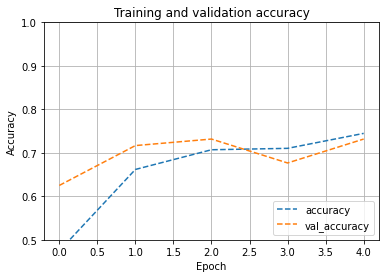

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy', linestyle='dashed')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', linestyle='dashed')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.grid()
plt.legend(loc='lower right')
plt.savefig('accuracy.png')

In [ ]:
model.evaluate(test_images, test_labels_cat)

32/32 [==============================] - 4s 127ms/step - loss: 0.7207 - accuracy: 0.7420


[0.7206827998161316, 0.7419999837875366]

#Making predictions

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)
print(pred[:25])
print(test_labels[:25])


[0 0 5 1 3 1 3 7 4 3 1 4 7 5 7 1 2 7 4 0 5 3 1 4 5]
[0 0 5 1 3 1 3 7 4 3 2 4 7 5 7 1 3 7 4 0 5 3 1 4 5]


#Bad prediction example

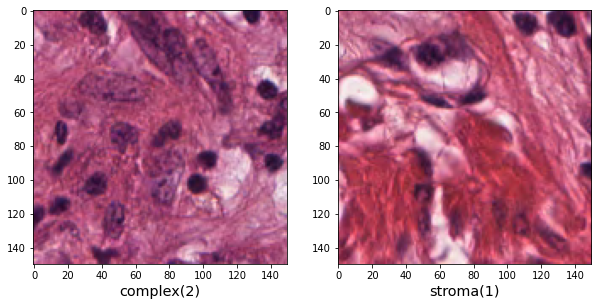

In [ ]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(np.rot90(test_images[10],2))
plt.xlabel(info.features["label"].names[test_labels[10]] + 
             f"({test_labels[10]})", fontsize='x-large')
f.add_subplot(1,2, 2)
plt.imshow(np.rot90(test_images[3],2))
plt.xlabel(info.features["label"].names[test_labels[3]] + 
             f"({test_labels[3]})", fontsize='x-large')
plt.show(block=True)